# Gewöhnliche DGL

In [2]:
import numpy as np
np.set_printoptions(precision=2, linewidth=65)

import matplotlib.pyplot as plt
plt.rc('figure', dpi=150)

import seaborn as sns
sns.set()
sns.set_style('ticks')
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.2})

import scipy.integrate

Bei gewöhnlichen Differentialgleichungen werden zwei Fälle unterschieden: Anfangswertproblem und Randwertproblem. Für beide gilt, dass die Lösung auf einem Intervall gesucht wird, jedoch wird im ersten Fall nur der Anfangswert vorgegeben und im zweiten Fall die Lösungswerte an den (im eindimensionalen Fall zwei) Randpunkten des Intervalls.

Hinweis: Alle physikalischen Konstanten sind in diesem Kapitel vernachlässigt, um den Fokus auf die numerischen Lösungsmethoden zu setzten.

## Anfangswertproblem

Als Beispiel für ein Anfangswertproblem und dessen Lösung werden im Folgenden zwei Gleichungen vorgestellt und numerisch gelöst. 

Im ersten Beispiel wird die zeitliche Temperaturentwicklung $\sf T(t)$ mittels der Gleichung

$$\sf T'(t) = -(T(t)-T_\infty) + Q(t)$$

vorgeschrieben und ein Anfangswert, d.h. $\sf T(t=0) = T_0$, gegeben. Dabei ist $\sf T_\infty$ eine Konstante und $\sf Q(t)$ eine Funktion der Zeit. Die Gleichung beschreibt die Änderung der Temperatur aufgrund des Unterschieds zur Umgebung ($\sf T_\infty$) und eines vorgegebenen Wärmestroms ($\sf Q(t)$).

Die Diskretisierung in der Zeit mit einem frei gewählten $\sf \Delta t$ führt zu folgender Näherung der Ableitung

$$\sf \frac{T^{n+1} - T^n}{\Delta t} = -(T(t)-T_\infty) + Q(t)$$ 

Hierbei wird der Index, welcher der Zeitpunkt angibt, oben aufgeführt. Dies ist eine Konvention, welche später bei partiellen Differentialgleichungen die Indizierung lesbarer macht. 

Die Terme auf der rechnten Seite der Gleichung sind aber noch nicht diskretisiert. Hierbei gibt es zwei Möglichkeiten: die Auswertung zum Zeitpunkt $\sf n$ oder $\sf n+1$. Wird die erste gewählt, so führt dies zum expliziten Euler-Verfahren

$$\sf \frac{T^{n+1} - T^n}{\Delta t} = -(T^n-T_\infty) + Q^n$$

Die zweite Möglichkeit, d.h. die Auswertung der Terme zum Zeitpunkt $\sf n+1$ führt zum impliziten Euler-Verfahren, auf welches hier nicht weiter eingegangen wird.

Die Umformung der Gleichung, welche nach dem expliziten Euler-Verfahren erzeugt wurde, nach dem nächsten Wert der Lösung, d.h. $\sf T^{n+1}$, ergibt

$$ \sf T^{n+1} = T^n -\Delta t (T^n-T_\infty) + Q^n$$

Damit kann mittels der Informationen zum Zeitpunkt $\sf n$ die Lösung zum Zeitpunkt $\sf n+1$ direkt (explizit) berechnet werden. Mit dem vorgegebenen Anfangswert, $\sf T^0 = T_0$ kann der nächste Lösungswert $\sf T^1$, daraus dann $\sf T^2$ und so weiter berechnet werden.

Als erstes Lösungsbeispiel wird 

$$\sf T_0 = 400, T_\infty = 300, Q(t) = 0 $$

gewählt und die Lösung soll bis $\sf t=50$ mit $\sf \Delta t=1$ gesucht werden.

In [38]:
# Setzten der Konstanten
T0 = 400
Tinfty = 300
dt = 0.5

In [19]:
# Anlegen des Zeit- und Lösungsarrays
zeit = np.arange(0, 10, dt)
T = np.zeros_like(zeit)

# Setzten des Anfangswerts
T[0] = T0

In [20]:
# Lösung nach dem expliziten Euler-Verfahren
for n in range(0, len(zeit)-1):
    T[n+1] = T[n] - dt * (T[n] - Tinfty)

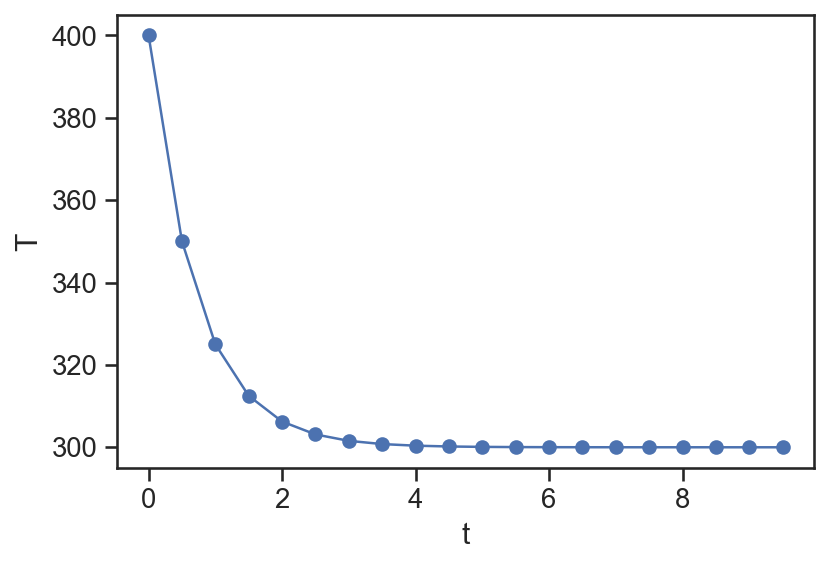

In [21]:
# Visualisierung der Lösung
plt.plot(zeit, T, '-o')
plt.xlabel("t")
plt.ylabel("T");

Im zweiten Lösungsbeispiel wird nun die Funktion $\sf Q(t)$ als Stufenfunktion hinzugenommen, mit

$$\sf Q(t) = \left\{ \begin{array}{cc} 
                100 & 5 \le t \le 15 \\
                0 & \text{sonst}
                \end{array} \right. $$
                
und die Lösung soll bis $\sf t=25$ berechnet werden.

In [33]:
# Anlegen des Zeit- und Lösungsarrays
zeit = np.arange(0, 25, dt)
T = np.zeros_like(zeit)

# Setzten des Anfangswerts
T[0] = T0

In [36]:
# Lösung nach dem expliziten Euler-Verfahren
for n in range(0, len(zeit)-1):
    t = zeit[n]
    
    # Quellterm Q
    Q = 0
    if t >= 5 and t <= 15:
        Q = 100
    
    # Zeititeration
    T[n+1] = T[n] - dt * (T[n] - Tinfty) + Q

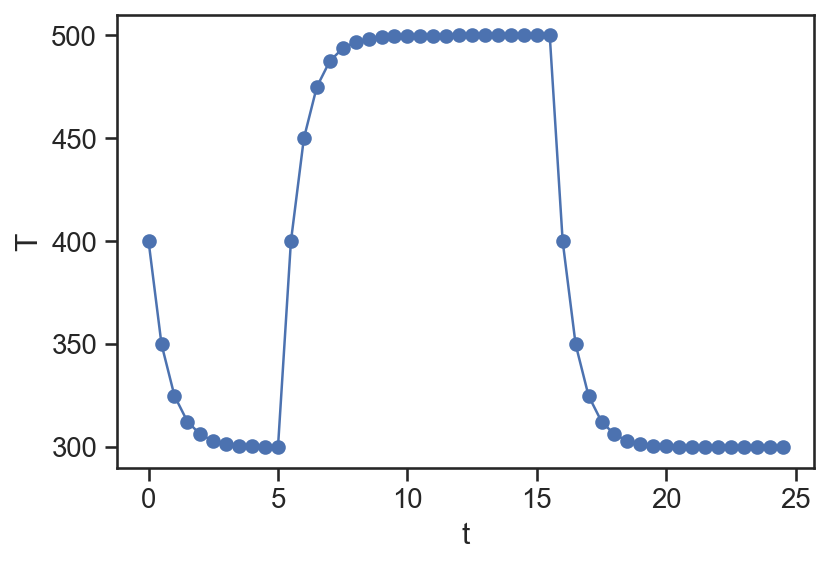

In [37]:
# Visualisierung der Lösung
plt.plot(zeit, T, '-o')
plt.xlabel("t")
plt.ylabel("T");

In [1]:
def rhs1(t, T):
    Tinfty = 300
    Q = 0
    return -(T-Tinfty) + Q

In [1]:
def rhs2(t, T):
    Tinfty = 300
    Q = 0
    if t > 25 and t < 50: Q = 100
    return -(T-Tinfty) + Q

In [24]:
res = scipy.integrate.solve_ivp(rhs, [0, 100], [300], dense_output=True)

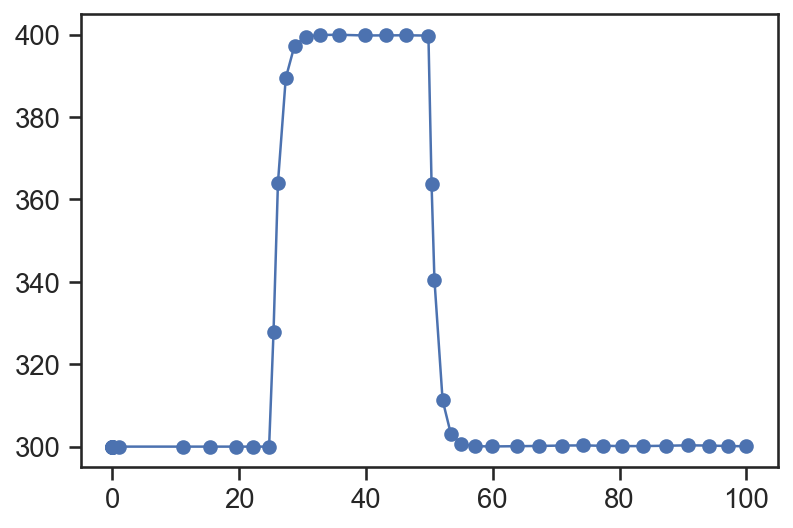

In [26]:
plt.plot(res.t, res.y[0], '-o')

In [58]:
def osc_rhs(t, u):
    y = u[0]
    z = u[1]
    # y' 
    yp = z
    # z'
    zp = - 2*y - 0.2*z
    return [yp, zp]

In [59]:
res = scipy.integrate.solve_ivp(osc_rhs, [0, 50], [1, 0], dense_output=True)

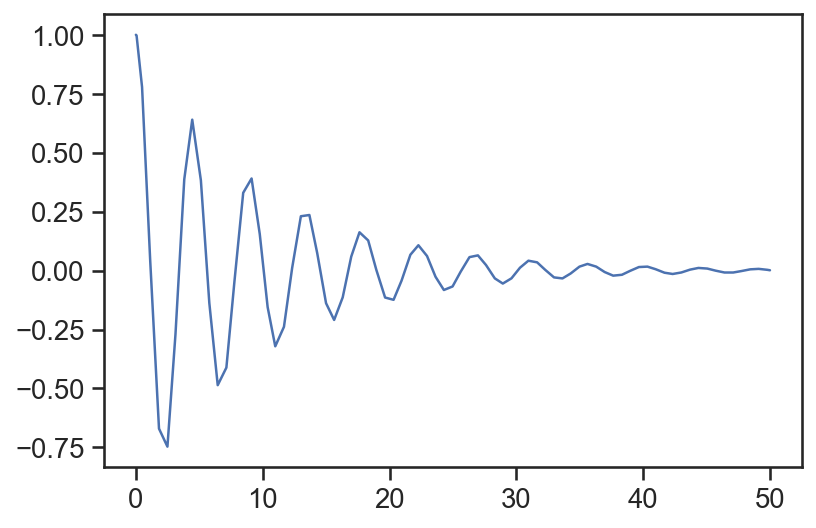

In [60]:
plt.plot(res.t, res.y[0], '-')

In [130]:
def beam_rhs(x, u):
    y0 = u[0]
    y1 = u[1]
    y2 = u[2]
    y3 = u[3]
    # y' 
    yp = y1
    ypp = y2
    yppp = y3
    ypppp = x*0 - 0.01
    return np.vstack((yp, ypp, yppp, ypppp))

In [133]:
def beam_bc(ya, yb):
#     print(ya, yb)
    return np.array([ya[0]-1, ya[2], yb[0], yb[2]])

In [134]:
x = np.linspace(0,10,25)
y_0 = np.zeros((4, x.size))

res = scipy.integrate.solve_bvp(beam_rhs, beam_bc, x, y_0)
# print(res)

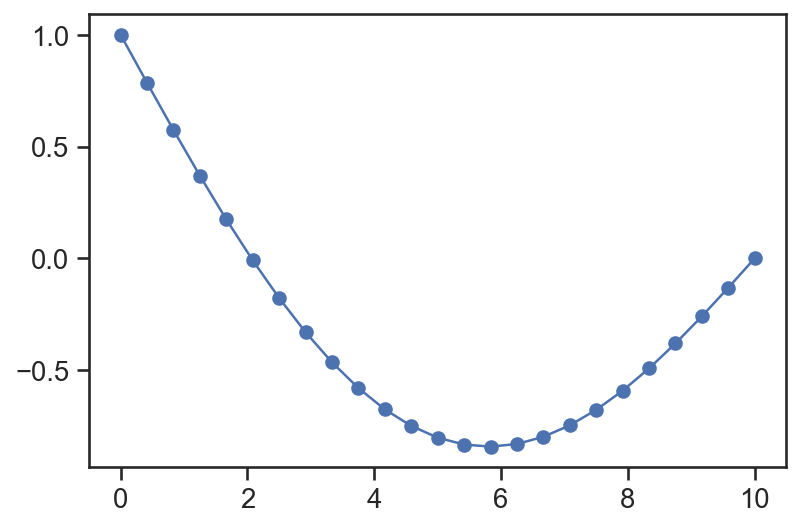

In [135]:
plt.plot(res.x, res.y[0], '-o')